<h2> Project Case - Boston Housing Prices </h2>

A Data Scientist with a housing agency in Boston MA has been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on his/her experience in Statistics, what information can he/she provide them to help with making an informed decision? Upper management will like to get some insight into the following.

1.   Is there a significant difference in the median value of houses bounded by the Charles river or not?
2.   Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
1.   Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
2.   What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that he/she think will be useful for the upper management to give them important insight given the question they are asking, in his/her graphs, include an explanation of each statistic.

First, we import the needed libraries and load the Boston housing dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

Then we load the data in the form of a data frame.

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df = boston_df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]]
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


We show the descriptive statistics of each variable or column.

In [3]:
# Descriptive Statistics

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


We visualize the owner-occupied homes and observe the median value of owner-occupied homes.

Text(0.5, 0, 'Median value (in USD 1,000)')

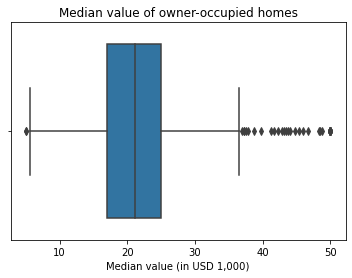

In [4]:
ax = sns.boxplot(x = boston_df["MEDV"])
ax.set_title("Median value of owner-occupied homes")
ax.set_xlabel("Median value (in USD 1,000)")

In [5]:
np.median(boston_df['MEDV'])

21.2

We can conclude that the box plot truly shows that the median is a little bit greater than 20, which is 21.2. The median value of owner-occupied homes is USD 21,200.

We provide a histogram for the Charles river dummy variable.

Text(0.5, 1.0, 'Histogram of Charles River dummy variable')

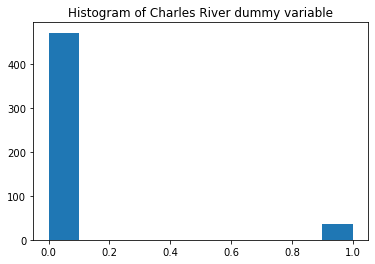

In [6]:
pyplot.hist(boston_df['CHAS'])
pyplot.title("Histogram of Charles River dummy variable")

We can see that there are 471 occurrences in which the tract bounds the Charles River and 35 occurrences otherwise.

We provide a boxplot for the MEDV variable vs the AGE variable. (the age variable is discretized into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
# Discretize the AGE variable first

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

Text(0.5, 0, 'Age groups')

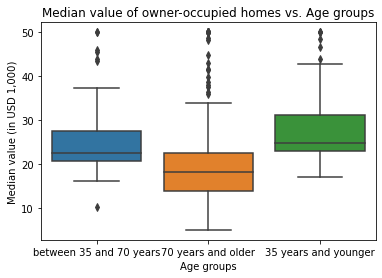

In [8]:
# Plot MEDV vs. AGE_GROUP

ax = sns.boxplot(x = "AGE_GROUP", y = "MEDV", data = boston_df)
ax.set_title("Median value of owner-occupied homes vs. Age groups")
ax.set_ylabel("Median value (in USD 1,000)")
ax.set_xlabel("Age groups")

In [9]:
print("The median value of owner-occupied homes aged 35 years and younger is:", np.median(boston_df[boston_df["AGE_GROUP"] == "35 years and younger"]["MEDV"]))
print("The median value of owner-occupied homes aged between 35 and 70 years is:", np.median(boston_df[boston_df["AGE_GROUP"] == "between 35 and 70 years"]["MEDV"]))
print("The median value of owner-occupied homes aged 70 years and older is:", np.median(boston_df[boston_df["AGE_GROUP"] == "70 years and older"]["MEDV"]))

The median value of owner-occupied homes aged 35 years and younger is: 24.8
The median value of owner-occupied homes aged between 35 and 70 years is: 22.6
The median value of owner-occupied homes aged 70 years and older is: 18.2


We provide a scatter plot to visualize the relationship between Nitric oxide concentrations and the proportion of non-retail businesses acres per town.

Text(0, 0.5, 'NOX concentration (parts per 10 million)')

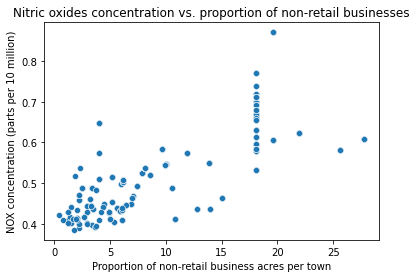

In [10]:
# Plot a scatter plot that shows relationship between NOX and INDUS

ax = sns.scatterplot(x = "INDUS", y = "NOX", data = boston_df)
ax.set_title("Nitric oxides concentration vs. proportion of non-retail businesses")
ax.set_xlabel("Proportion of non-retail business acres per town")
ax.set_ylabel("NOX concentration (parts per 10 million)")

From the above scatter plot, we can see that there is a positive correlation between the nitric oxide concentration and proportion of non-retail business acres per town.

We create a histogram for the pupil to teacher ratio variable.

Text(0.5, 1.0, 'Pupil-teacher ratio by town')

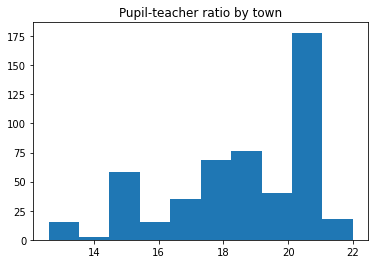

In [11]:
# Plot a histogram of pupil-to-teacher ratio

pyplot.hist(boston_df["PTRATIO"])
pyplot.title("Pupil-teacher ratio by town")

We would like to know if there is a significant difference in median value of houses bounded by the Charles river or not. We performed T-test for independent samples for this case.
</br>

Our null hypothesis is that there is no significant difference in median value of houses bounded by the Charles River. We use α = 0.05.

In [19]:
# Use Levene's Test to check test significance

scipy.stats.levene(boston_df[boston_df["CHAS"] == 0]["MEDV"],
                   boston_df[boston_df["CHAS"] == 1]["MEDV"], center='mean')

# since the p-value is less than 0.05 we can assume inequality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [21]:
# Use T-test for independent samples

scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 0]["MEDV"],
                      boston_df[boston_df["CHAS"] == 1]["MEDV"], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Text(0.5, 1.0, 'Median value of houses bounded by Charles River')

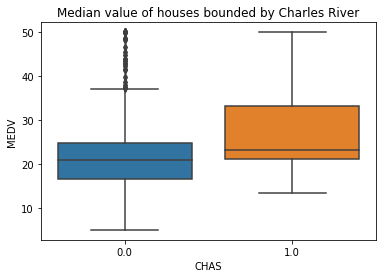

In [18]:
ax = sns.boxplot(x = "CHAS", y = "MEDV", data = boston_df)
ax.set_title("Median value of houses bounded by Charles River")

<b>Conclusion</b>: since the p-value is 0.0000739, which is much smaller than 0.05, then we can reject the null hypothesis and we can state that there is a significant difference in median value of houses bounded by the Charles River. And if we plot a box plot of the median value of houses and the Charles River dummy variable, there is a slight difference in median but the interquartile range of the median value of houses bounded by the Charles River tends to comprise higher values.

Then we would like to know if there is a difference in median value of houses for each proportion of owner-occupied units built before 1940. We'll use ANOVA in this case, since there are three age groups (35 years and younger, between 35 and 70 years, and 70 years and older).
</br>

Our null hypothesis is that there is no difference in median value of houses for each proportion of owner-occupied units. We use α = 0.05.

In [23]:
# Perform Levene's Test to check equality of variance

scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

# since the p-value is more than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [24]:
# Perform a one-way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<b>Conclusion</b>: since the p-value is much smaller than 0.05, we can reject the null hypothesis and we can conclude that there is a significant evidence that at least one of the means of median value of houses is different.

Next, we would like to see if there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town. We use Pearson's Correlation in this case, since the two variables (NOX and INDUS) are continuous variables.
</br>

Our null hypothesis is that Nitric oxide concentrations is not correlated with the proportion of non-retail business acress per town.

Text(0.5, 1.0, 'NOX concentration vs. proportion of non-retail business acres')

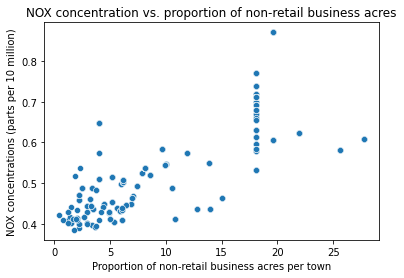

In [27]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set_xlabel("Proportion of non-retail business acres per town")
ax.set_ylabel("NOX concentrations (parts per 10 million)")
ax.set_title("NOX concentration vs. proportion of non-retail business acres")

In [28]:
# Check the correlation between NOX and INDUS

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

<b>Conclusion</b>: since the Pearson's correlation coefficient is 0.76, we can conclude that there is a positive (and moderately strong) correlation between nitric oxide concentration and proportion of non-retail business acres. Moreover, since the p-value is extremely small, we can reject our null hypothesis and conclude that there is a correlation between nitric oxide concentration and proportion of-non retail business acres. The higher the proportion of non-retail business acres, the higher the concentration of nitric oxide emitted to the atmosphere.

Finally, we would like to know the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
</br>

We put the weighted distance in the x-axis and the median value of owner-occupied homes in the y-axis, because we would like to know the impact of DIS on MEDV.
</br>

Our null hypothesis is that an additional weighted distance has no impact on the median value of owner occupied homes. We use α = 0.05.

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        23:26:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Median value (in $1,000)')

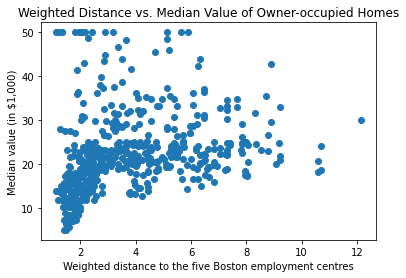

In [36]:
pyplot.scatter(x = "DIS", y = "MEDV", data = boston_df)
pyplot.title("Weighted Distance vs. Median Value of Owner-occupied Homes")
pyplot.xlabel("Weighted distance to the five Boston employment centres")
pyplot.ylabel("Median value (in $1,000)")

In [34]:
# Check the correlation between DIS and MEDV

scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.2499287340859039, 1.2066117273368017e-08)

<b>Conclusion</b>: since the p-value is much smaller than 0.05, we reject the null hypothesis and we conclude that there is a correlation between the weighted distance and median value of owner-occupied homes. And since the Pearson's correlation coefficient is 0.2499, we can conclude that there is a positive correlation between the weighted distance and median value of owner-occupied homes. 